# Classification of Image Data with Multilayer Perceptrons and Convolutional Neural Networks

## Installations

In [1]:
import medmnist
import torch
import math
import torch.utils.data as data
import torchvision.transforms as transforms
from torch.nn.functional import one_hot
import matplotlib.pyplot as plt
from medmnist import INFO, Evaluator
from medmnist import OrganAMNIST
import numpy as np
print(medmnist.__version__)

3.0.2


## Task 1: Acquire the data / Investigate data

We utilize pytorch for the convienent dataloader format, as described in: 
    https://github.com/MedMNIST/MedMNIST/blob/main/examples/getting_started.ipynb   

NOTE: We must pre-process labels to be OHE

In [2]:
data_flag = 'organamnist'
download = True


info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

In [3]:
# preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0], std = [1])
])

# load the data
train_dataset = DataClass(split='train', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)

pil_dataset = DataClass(split='train', download=download)

# train_loader = data.DataLoader(dataset = train_dataset, batch_size= 64, shuffle = True)
# test_loader = data.DataLoader(dataset = test_dataset, batch_size=64, shuffle=True)

Using downloaded and verified file: /home/sebastiancsabry/.medmnist/organamnist.npz
Using downloaded and verified file: /home/sebastiancsabry/.medmnist/organamnist.npz
Using downloaded and verified file: /home/sebastiancsabry/.medmnist/organamnist.npz


In [4]:
X = np.array([train_dataset[i][0].numpy() for i in range(len(train_dataset))])  # Image data as numpy array
y = np.array([train_dataset[i][1] for i in range(len(train_dataset))])  # Labels

In [5]:
print(X.shape)
print(y.shape)

(34561, 1, 28, 28)
(34561, 1)


In [6]:
n_features= X.shape[2]*X.shape[3]
x = X.reshape(-1, n_features)

In [7]:
x.shape

(34561, 784)

In [8]:
y = np.eye(11)[y]
y = np.squeeze(y)

In [9]:
y.shape

(34561, 11)

In [10]:
from sklearn.model_selection import train_test_split
import numpy as np


# Perform 80-20 split
X_train, X_test = train_test_split(x, test_size=0.2, random_state=42)
y_train, y_test = train_test_split(y, test_size= 0.2, random_state=42)


An example visulization:

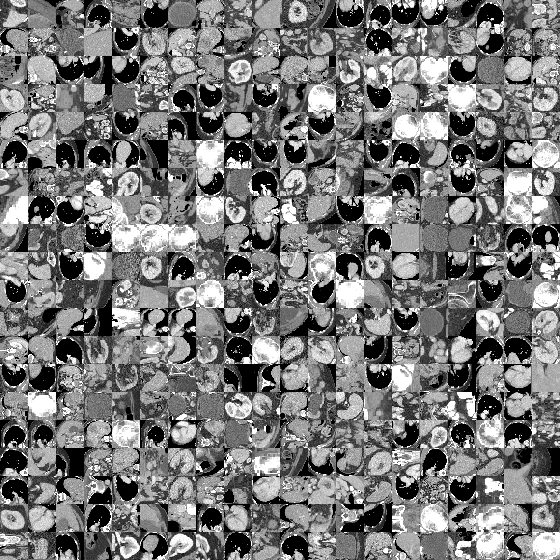

In [11]:
# montage
train_dataset.montage(length=20)

# Task 2: Implement a Multilayer Perceptron

# Task 3: 1.

In [11]:
from mlp import MLPSoftmax, ActivationFunction,  ReLU, ReLU_derivative, random_initalizer, random_optimized_initalizer, softmax, softmax_derivative

## (1) MLP with no hidden layers.

Epoch 99
Train accuracy: 0.6515480324074074
Test accuracy: 0.6515261102271084


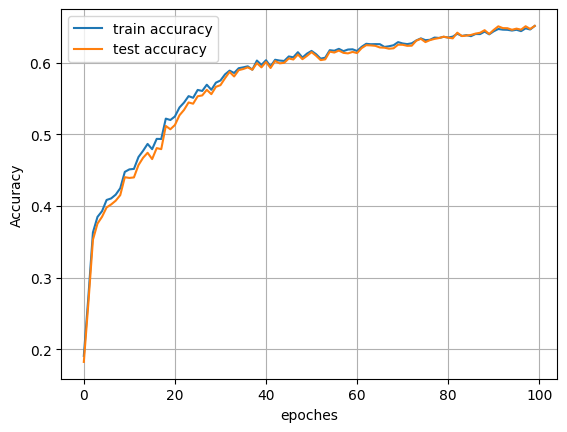

In [12]:
activation_loss_function = ActivationFunction(func=softmax, derivative=softmax_derivative)
mlp_no_hidden_layers = MLPSoftmax(initalizer=random_initalizer, loss_activation= activation_loss_function,  activation_function=None, layer_sizes=[784, 11]) #We know the dimensions from torch.flatten()
mlp_no_hidden_layers.fit(X_train= X_train, y_train= y_train, X_test=X_test, y_test=y_test, learning_rate=0.01,
                         epochs=100, batch=64, termination_condition=1e-2, max_iters=100, plot=True)

## (2) MLP with single layer (256 Units) and Relu activation.

Epoch 99
Train accuracy: 0.6773003472222222
Test accuracy: 0.668595399971069


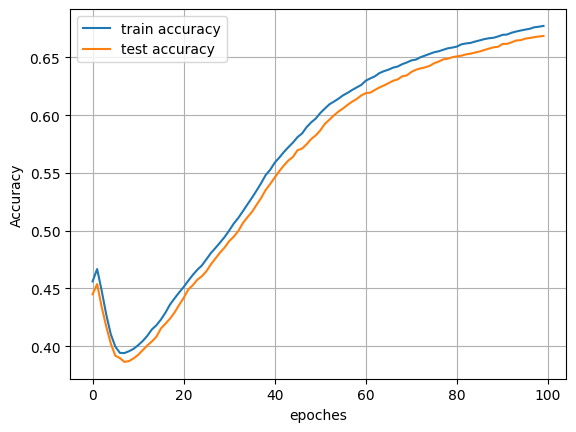

In [13]:
activation_loss_function = ActivationFunction(func=softmax, derivative=softmax_derivative)
activation_function_relu = ActivationFunction(func = ReLU, derivative= ReLU_derivative)
mlp_1_hidden_layers_relu = MLPSoftmax(initalizer=random_optimized_initalizer, loss_activation= activation_loss_function,  activation_function=activation_function_relu, layer_sizes=[784,256, 11]) #We know the dimensions from torch.flatten()
mlp_1_hidden_layers_relu.fit(X_train= X_train, y_train= y_train, X_test=X_test, y_test=y_test, learning_rate=0.001,
                         epochs=100, batch=128, termination_condition=1e-2, max_iters=1000, plot=True)

## (3) MLP with two hidden units (256, 256) and Relu activation. 

Epoch 99
Train accuracy: 0.00538917824074074
Test accuracy: 0.004918269926225951


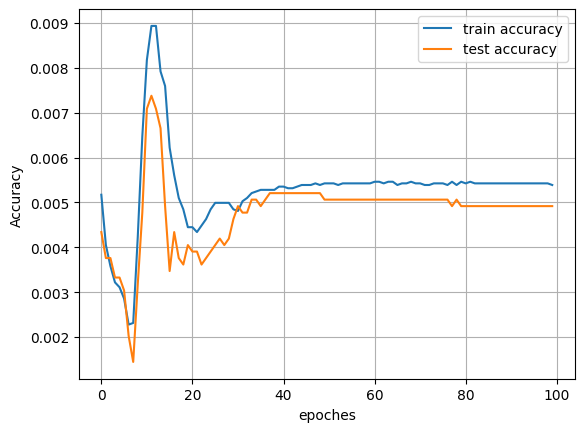

In [ ]:
activation_loss_function = ActivationFunction(func=softmax, derivative=softmax_derivative)
activation_function_relu = ActivationFunction(func = ReLU, derivative= ReLU_derivative)
mlp_2_hidden_layers_relu = MLPSoftmax(initalizer=random_optimized_initalizer, loss_activation= activation_loss_function,  activation_function=activation_function_relu, layer_sizes=[784,256,256,11]) #We know the dimensions from torch.flatten()
mlp_2_hidden_layers_relu.fit(X_train= X_train, y_train= y_train, X_test=X_test, y_test=y_test, learning_rate=-0.01,
                         epochs=100, batch=256, termination_condition=1e-2, max_iters=1000, plot=True)

# Task 3.2